Enter keyword/hashtag to search about: Oxygen
Enter how many tweets to analyze: 100
How people are reacting on Oxygen by analyzing 100 tweets.
Neutral


<ipython-input-12-510ebf0fb8ff>:66: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts=plt.pie(sizes,colors=colors,startangle=90)


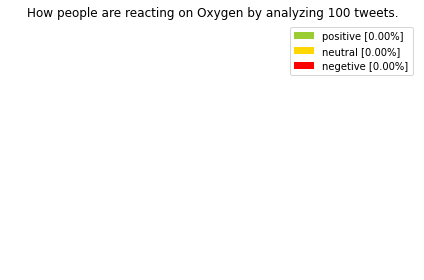

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
 
 
def percentage(part,whole):
    return 100 * float(part)/float(whole)
consumerkey="UMBOhuuh6K9TxLKjKYDIuX1LK"
consumersecret="jDSSWVmWskGDRj7mY9ONtet6yYMC4RdwY5rigzggoTsaWaIjI2"
accessToken="1392422374503452672-a7GAo5287b1TqOPKCdHSKmWvzwy6lu"
accessTokenSecret="Dfg8ltPAev6BQULwvhyZFPbs5L4sUmDI0VSixVeLSS7qZ"
 
auth=tweepy.OAuthHandler(consumerkey,consumersecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)
 
searchTerm=input("Enter keyword/hashtag to search about: ")
noOfSearchTerms=int(input("Enter how many tweets to analyze: "))
 
tweets=tweepy.Cursor(api.search,q=searchTerm,lang="English").items(noOfSearchTerms)
 
positive =0
negetive = 0
neutral = 0
polarity = 0
 
 
for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negetive += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
        
positive=percentage(positive,noOfSearchTerms)
negetive=percentage(negetive,noOfSearchTerms)
neutral=percentage(neutral,noOfSearchTerms)
 
positive =format(positive, '.2f')
 
neutral =format(neutral, '.2f')
 
negetive =format(negetive, '.2f')
 
print("How people are reacting on "+ searchTerm + " by analyzing "+ str(noOfSearchTerms) + " tweets.")
if(polarity==0):
     print("Neutral")
elif(polarity <0.00):
    print("Negetive")
     
elif(polarity >0.00):
    print("Positive")
     
    
labels = ['positive ['+str(positive)+'%]','neutral ['+str(neutral) +'%]','negetive ['+str(negetive)+'%]']
sizes =[positive,neutral,negetive]
colors=['yellowgreen','gold','red']
patches, texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches ,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm + " by analyzing "+ str(noOfSearchTerms) + " tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()